입/출력 변수 설정

In [59]:
input_file = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\파우스트 박사\\pg779-images.html"

In [60]:
output_file = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\파우스트 박사\\pg779-images.html"

불필요 태그 및 무대 지시어 삭제

In [61]:
import re

# Load the file
with open(input_file, 'r', encoding='utf-8') as file:
    content = file.read()

# Remove all <a>...</a> tags, including those with attributes
content = re.sub(r'<a\b[^>]*>.*?</a>', '', content)

# Remove all stage directions within square brackets []
content = re.sub(r'\[.*?\]', '', content)

# Save the cleaned content
with open(output_file, 'w', encoding='utf-8') as file:
    file.write(content)

print("All <a>...</a> tags (including with attributes), stage directions in [], and indentation have been removed.")


All <a>...</a> tags (including with attributes), stage directions in [], and indentation have been removed.


In [62]:
from bs4 import BeautifulSoup

# HTML 파일 불러오기
with open(input_file, 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'html.parser')

# <pre> 태그에서 들여쓰기가 두 번 된 무대 지시어 제거
for tag in soup.find_all('pre'):
    lines = tag.get_text().splitlines()
    new_lines = []
    
    for line in lines:
        if not line.startswith("          "):  # 들여쓰기가 두 번 된 줄만 제거
            new_lines.append(line)
        else:
            new_lines.append("")  # 빈 줄 추가
    
    # 수정된 내용으로 <pre> 태그에 다시 설정
    tag.string = "\n".join(new_lines)

# 수정된 파일 저장
with open(output_file, 'w', encoding='utf-8') as file:
    file.write(str(soup))


이름 태그 구분

In [63]:
from bs4 import BeautifulSoup
import re

# HTML 파일 불러오기
with open(input_file, 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'html.parser')

# <pre> 태그 내 등장인물 이름에 <name> 태그 추가
for tag in soup.find_all('pre'):
    lines = tag.get_text().splitlines()
    new_lines = []
    
    for line in lines:
        # '등장인물.대사' 형식 찾기
        match = re.match(r"^\s*([A-Z]+(?:[\s-][A-Z]+)*)\.\s*(.*)", line)
        if match:
            # 등장인물 이름과 대사를 각각 <name> 태그와 함께 추가
            character = match.group(1)
            dialogue = match.group(2).strip()
            new_lines.append(f"     <name>{character}<name>\n     {dialogue}")
        else:
            new_lines.append(line)  # 나머지 줄은 그대로 추가
    
    # 수정된 내용으로 <pre> 태그 업데이트
    tag.string = "\n".join(new_lines)

# 수정된 파일 저장
with open(output_file, 'w', encoding='utf-8') as file:
    file.write(str(soup))


문장 끝 -부분 제거

In [64]:
from bs4 import BeautifulSoup

def remove_hyphens_in_pre_tags(file_path):
    # HTML 파일 읽기
    with open(file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()

    # BeautifulSoup로 HTML 파싱
    soup = BeautifulSoup(html_content, 'html.parser')

    # 모든 <pre> 태그 찾기
    for pre in soup.find_all('pre'):
        # <pre> 태그 내 텍스트 줄 단위로 처리
        lines = pre.get_text().splitlines()
        cleaned_lines = [line.rstrip('-—') if line.endswith(('-', '—')) else line for line in lines]
        
        # <pre> 태그 내 텍스트 업데이트
        pre.string = "\n".join(cleaned_lines)

    # 수정된 HTML을 파일에 저장
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(str(soup))

# 사용 예시
remove_hyphens_in_pre_tags("C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\파우스트 박사\\pg779-images.html")


csv 파일로 값 작성하기

In [65]:
import re
import csv
from bs4 import BeautifulSoup

def html_to_csv(html_file, play_name, csv_file):
    # HTML 파일을 읽고 엔티티 변환 및 파싱
    with open(html_file, 'r', encoding='utf-8') as f:
        html_content = f.read()
        
    # HTML 엔티티 변환
    html_content = html_content.replace("&lt;", "<").replace("&gt;", ">")
    soup = BeautifulSoup(html_content, 'html.parser')

    # 초기 변수 설정
    act = None
    character = None
    scene = 'none'
    sentence_count = 0
    text_lines = []
    output_data = []

    # 정규표현식 패턴 설정
    character_pattern = r"^([A-Z]+(?:[\s-][A-Z]+)*)$"  # 등장인물 이름만 있는 줄 감지
    dialogue_pattern = r"^(.*)"  # 대사 줄 감지

    # HTML 요소 순회
    for element in soup.find_all(['h2', 'pre']):
        if element.name == 'h2':
            # <h2> 태그에서 Act 정보 추출
            act = element.get_text(strip=True)
            print(f"Found act: {act}")  # 디버깅 출력
        elif element.name == 'pre':
            # <pre> 태그에서 각 줄 처리
            for line in element.get_text().strip().splitlines():
                line = line.strip()
                
                # 줄을 출력하여 구조 확인
                print(f"Processing line: {line}")  # 디버깅용

                # 등장인물과 대사 매칭
                character_match = re.match(character_pattern, line)
                if character_match:
                    # 이전 등장인물의 대사 정보 저장
                    if character and text_lines:
                        # 각 대사 줄을 개별적으로 output_data에 추가
                        for i, dialogue_line in enumerate(text_lines, start=1):
                            output_data.append([
                                play_name, character, act, scene, i, dialogue_line
                            ])
                        print(f"Added data for character: {character}, act: {act}, sentences: {len(text_lines)}")  # 디버깅 출력
                    
                    # 새로운 등장인물 설정 및 sentence_count 초기화
                    character = character_match.group(1).strip()
                    text_lines = []
                    print(f"New character found: {character}")  # 디버깅 출력
                else:
                    dialogue_match = re.match(dialogue_pattern, line)
                    if dialogue_match:
                        # 대사 줄 추가
                        text_lines.append(line)
                        print(f"Adding line to dialogue: {line}")  # 디버깅 출력

            # 마지막 등장인물 대사 정보 저장
            if character and text_lines:
                for i, dialogue_line in enumerate(text_lines, start=1):
                    output_data.append([
                        play_name, character, act, scene, i, dialogue_line
                    ])
                print(f"Added final data for character: {character}, act: {act}, sentences: {len(text_lines)}")  # 디버깅 출력

    # CSV 파일로 출력
    if output_data:  # 데이터가 존재할 때만 CSV에 저장
        with open(csv_file, 'w', newline='', encoding='utf-8') as csvfile:
            csv_writer = csv.writer(csvfile)
            csv_writer.writerow(['play_name', 'character', 'act', 'scene', 'sentence', 'text'])  # 헤더 작성
            csv_writer.writerows(output_data)
            print(f"Data written to CSV: {csv_file}")  # 디버깅 출력
    else:
        print("No data was found to write to the CSV file.")

# 사용 예시
html_to_csv("C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\파우스트 박사\\pg779-images.html", 'THE TRAGICAL HISTORY OF DOCTOR FAUSTUS', "C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\파우스트 박사\\out_put.csv")


Found act: THE TRAGICAL HISTORY OF DOCTOR FAUSTUS
Processing line: FROM THE QUARTO OF 1604.
Adding line to dialogue: FROM THE QUARTO OF 1604.
Processing line: 
Adding line to dialogue: 
Processing line: 
Adding line to dialogue: 
Processing line: 
Adding line to dialogue: 
Processing line: 
Adding line to dialogue: 
Processing line: CHORUS
New character found: CHORUS
Processing line: Not marching now in fields of Thrasymene,
Adding line to dialogue: Not marching now in fields of Thrasymene,
Processing line: Where Mars did mate the Carthaginians;
Adding line to dialogue: Where Mars did mate the Carthaginians;
Processing line: Nor sporting in the dalliance of love,
Adding line to dialogue: Nor sporting in the dalliance of love,
Processing line: In courts of kings where state is overturn’d;
Adding line to dialogue: In courts of kings where state is overturn’d;
Processing line: Nor in the pomp of proud audacious deeds,
Adding line to dialogue: Nor in the pomp of proud audacious deeds,
Proc

공백값제거 및 라인넘버 재조정

In [66]:
import pandas as pd

# Load the CSV file
file_path = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\파우스트 박사\\out_put.csv"  # 여기에 기존 파일 경로를 입력하세요
df = pd.read_csv(file_path, encoding='utf-8')

# Remove rows where 'text' contains only whitespace or is empty
df['text'] = df['text'].replace(r'^\s*$', pd.NA, regex=True)
df = df.dropna(subset=['text']).reset_index(drop=True)

# Reassign sentence numbers, starting from 1 each time a character appears with a new line
df['sentence'] = df.groupby((df['character'] != df['character'].shift()).cumsum()).cumcount() + 1

# Overwrite the original file with the modified DataFrame
df.to_csv(file_path, index=False)

print("The file has been updated successfully.")


The file has been updated successfully.


대사 라인 불용어제거 및 토큰화(사용 x)

In [67]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
import re

# NLTK 불용어 다운로드
nltk.download('punkt')
nltk.download('stopwords')

# 기본 영어 불용어 목록 가져오기
stop_words = set(stopwords.words('english'))

# 르네상스 문학에서 불용어로 처리할 추가 단어 목록
renaissance_stopwords = {
    'thee', 'thou', 'thy', 'thine', 'ye', 'art', 'hast', 'dost',
    'wouldst', 'couldst', 'shouldst', 'speakest', 'knowest',
    'hath', 'dost', 'art thou', 'art not', 'mightest', 'mayest',
    'whence', 'hence', 'wherefore', 'what', 'which', 'who', 
    'when', 'why', 'ere', 'forsooth', 'alas', 'verily', 
    'anon', 'fie', 'goest', 'comest', 'seeest', 'thinkest', 
    'lovest', 'dost thou', 'I', 'me', 'my', 'mine', 'we', 
    'us', 'our', 'ours', "'d", "'s", "'ll", "'Tis", '-','--', "'twas"
}

# 전체 불용어 목록
all_stopwords = stop_words.union(renaissance_stopwords)

# 계약형 제거 함수 정의
def remove_contractions(text):
    # 정규 표현식을 사용하여 계약형 제거
    return re.sub(r"\b\w+'[a-zA-Z]+\b", '', text)

# CSV 파일 읽기
input_file = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\파우스트 박사\\파우스트 박사 out_put.csv"  # 원본 CSV 파일 경로
df = pd.read_csv(input_file, encoding='ISO-8859-1')

# 기호와 불용어를 제거하는 함수 정의
def tokenize_and_remove_stopwords_and_punctuation(text):
    # 계약형 제거
    remove_contractions(text)
    # 토큰화
    tokens = word_tokenize(text)
    # 기호와 불용어 제거
    cleaned_tokens = [word for word in tokens if word.lower() not in all_stopwords and word not in string.punctuation]
    return cleaned_tokens

# 'content' 칼럼의 각 문장을 토큰화하고 불용어 및 기호 제거
df['tokens'] = df['text'].apply(tokenize_and_remove_stopwords_and_punctuation)

# 새로운 CSV 파일로 저장
output_file = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\파우스트 박사\\tokenized_Doctor Faustus.csv"  # 저장할 파일 경로
df.to_csv(output_file, index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kang8\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kang8\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


토큰 중 등장인물 제거(사용x)

In [68]:
import pandas as pd
import ast

# CSV 파일 불러오기
df = pd.read_csv("C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\파우스트 박사\\tokenized_Doctor Faustus.csv")

# 'play_name' 칼럼에서 고유값 리스트 생성
unique_play_names = df['character'].unique().tolist()

# unique_play_names 출력
print("Unique play names:", unique_play_names)

# 'tokens' 리스트에서 'play_name' 값 제거 함수
def remove_play_names_from_tokens(row):
    # 문자열 형태의 리스트를 실제 리스트로 변환
    tokens = ast.literal_eval(row['tokens']) if isinstance(row['tokens'], str) else row['tokens']
    # tokens 리스트에서 unique_play_names에 없는 값들만 남김
    return [token for token in tokens if token not in unique_play_names]

# 'tokens' 컬럼에서 'play_name'에 해당하는 고유값들을 제거
df['tokens'] = df.apply(remove_play_names_from_tokens, axis=1)

# 수정된 DataFrame을 새로운 CSV 파일로 저장
df.to_csv("C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\파우스트 박사\\modified_tokenized_tokenized_Doctor Faustus.csv", index=False)

Unique play names: ['CHORUS', 'FAUSTUS', 'WAGNER', 'GOOD ANGEL', 'EVIL ANGEL', 'VALDES', 'CORNELIUS', 'FIRST SCHOLAR', 'SECOND SCHOLAR', 'MEPHIST', 'CLOWN', 'FOLLOWING', 'SUBSTANCE', 'AND AT HIS COMMAND', 'AND BRING HIM WHATSOEVER HE DESIRES', 'BE IN HIS CHAMBER OR HOUSE INVISIBLE', 'SOEVER HE PLEASE', 'HABITATION WHERESOEVER', 'LUCIFER', 'PRIDE', 'COVETOUSNESS', 'WRATH', 'ENVY', 'GLUTTONY', 'SLOTH', 'LECHERY', 'POPE', 'FIRST FRIAR', 'C', 'ROBIN', 'RALPH', 'VINTNER', 'EMPEROR', 'KNIGHT', 'HORSE-COURSER', 'DUKE', 'DUCHESS', 'THIRD SCHOLAR', 'OLD MAN', 'ALL']


ACT/SCENE 값처리

In [12]:
import pandas as pd

# 예시 CSV 파일 읽기
file_path = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\탬벌레인 대왕 총합본\\RoBertA_output_with_sentiment_scores.csv"
df = pd.read_csv(file_path)

# ACT와 SCENE 값의 변환 매핑
act_mapping = {
    "ACT I.": 1,
    "ACT II.": 2,
    "ACT III.": 3,
    "ACT IV.": 4,
    "ACT V.": 5
}

scene_mapping = {
    "SCENE I.": 1,
    "SCENE II.": 2,
    "SCENE III.": 3,
    "SCENE IV.": 4,
    "SCENE V.": 5
}

# ACT와 SCENE 열을 변환
df['act'] = df['act'].replace(act_mapping)
df['scene'] = df['scene'].replace(scene_mapping)

# 변환된 데이터를 새로운 CSV 파일로 저장
output_file_path = file_path
df.to_csv(output_file_path, index=False)

print(f"변환된 파일이 '{output_file_path}'에 저장되었습니다.")


# 변환 결과 확인
print(df.head())


변환된 파일이 'C:\Users\kang8\OneDrive\바탕 화면\빅데이터융합개론\크리스토퍼 말로우\탬벌레인 대왕 총합본\RoBertA_output_with_sentiment_scores.csv'에 저장되었습니다.
                     play_name character  act scene  sentence  \
0  Tamburlaine the Great-Part1   MYCETES    1     1         1   
1  Tamburlaine the Great-Part1   MYCETES    1     1         2   
2  Tamburlaine the Great-Part1   MYCETES    1     1         3   
3  Tamburlaine the Great-Part1   MYCETES    1     1         4   
4  Tamburlaine the Great-Part1   MYCETES    1     1         5   

                                             text  \
0         Brother Cosroe, I find myself agriev'd;   
1           Yet insufficient to express the same,   
2  For it requires a great and thundering speech:   
3     Good brother, tell the cause unto my lords;   
4            I know you have a better wit than I.   

                                              tokens  sentiment_score  
0            ['Brother', 'Cosroe', 'find', 'agriev']         0.070992  
1                 ['Yet'

C:\Users\kang8\AppData\Local\Temp\ipykernel_99644\3290927928.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['act'] = df['act'].replace(act_mapping)


VADER 감정 분석(사용 x)

In [ ]:
pip install vaderSentiment

In [70]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# CSV 파일 읽기
df = pd.read_csv("C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\파우스트 박사\\modified_tokenized_tokenized_Doctor Faustus.csv")

# VADER 감정 분석 초기화
analyzer = SentimentIntensityAnalyzer()

# 감정 점수 계산 함수
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# 'text' 칼럼의 각 대사에 대해 감정 점수 계산
df['sentiment_score'] = df['text'].apply(get_sentiment)

# 결과 출력 또는 파일로 저장
print(df[['text', 'sentiment_score']])

# CSV 파일로 저장
df.to_csv("C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\파우스트 박사\\sentiment_analysis_output.csv", index=False)


                                                text  sentiment_score
0          Not marching now in fields of Thrasymene,           0.0000
1             Where Mars did mate the Carthaginians;           0.0000
2             Nor sporting in the dalliance of love,           0.6369
3     In courts of kings where state is overturn?d;           0.0000
4          Nor in the pomp of proud audacious deeds,           0.6124
...                                              ...              ...
1418     Whose fiendful fortune may exhort the wise,           0.4767
1419              Only to wonder at unlawful things,           0.0000
1420    Whose deepness doth entice such forward wits           0.0000
1421   To practice more than heavenly power permits.           0.6461
1422       Terminat hora diem; terminat auctor opus.           0.0000

[1423 rows x 2 columns]


셰익스피어와 크리스토버 말로 감정변화 시각화

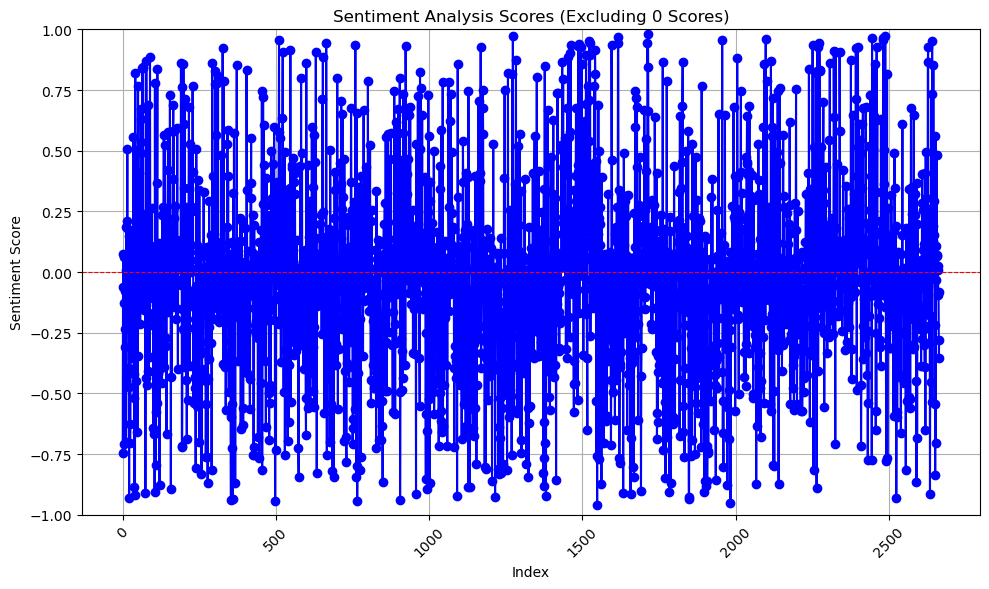

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기
file_path = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\셰익스피어\\베니스의 상인\\RoBertA_output_with_sentiment_scores.csv"  # CSV 파일 경로를 입력하세요.
data = pd.read_csv(file_path)

# 감정 점수가 0인 값 제외
filtered_data = data[data['sentiment_score'] != 0]

# 감정 점수 시각화
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['sentiment_score'].reset_index(drop=True), marker='o', linestyle='-', color='b')
plt.title('Sentiment Analysis Scores (Excluding 0 Scores)')
plt.xlabel('Index')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.axhline(0, color='red', linewidth=0.8, linestyle='--')  # 감정 점수가 0인 기준선 추가
plt.ylim([-1, 1])  # 감정 점수의 범위 설정
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()


감정분석 스무딩

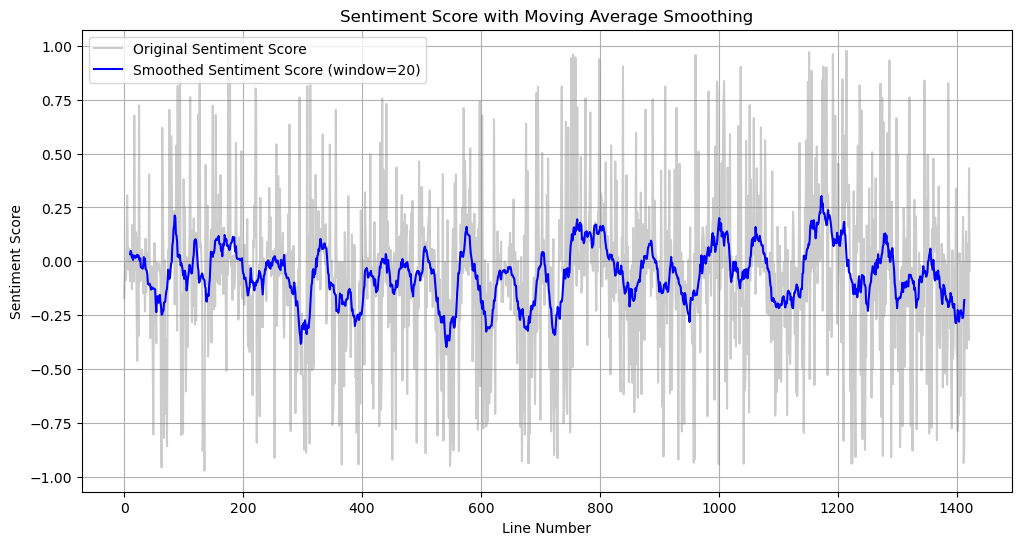

In [72]:
# CSV 파일 읽기
file_path = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\파우스트 박사\\RoBertA_output_with_sentiment_scores.csv"
df = pd.read_csv(file_path)

# 'line_number' 열 추가 (0부터 시작)
df['line_number'] = range(len(df))

# 이동 평균 및 시각화 진행
window_size = 20
df['smoothed_sentiment'] = df['sentiment_score'].rolling(window=window_size, center=True).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['line_number'], df['sentiment_score'], label='Original Sentiment Score', color='gray', alpha=0.4)
plt.plot(df['line_number'], df['smoothed_sentiment'], label=f'Smoothed Sentiment Score (window={window_size})', color='blue')

plt.xlabel('Line Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score with Moving Average Smoothing')
plt.legend()
plt.grid(True)
plt.show()


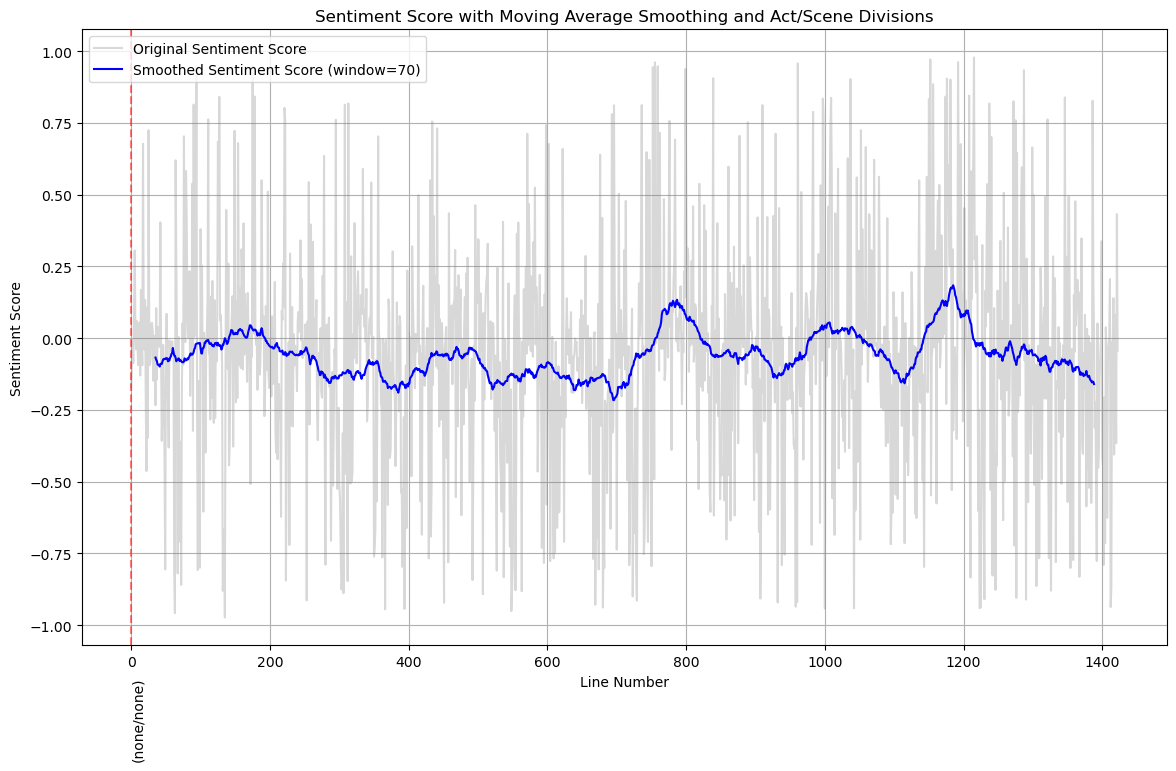

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기
file_path = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\파우스트 박사\\RoBertA_output_with_sentiment_scores.csv"
df = pd.read_csv(file_path)

# 'line_number' 열 추가 (0부터 시작)
df['line_number'] = range(len(df))

# 이동 평균 계산
window_size = 70
df['smoothed_sentiment'] = df['sentiment_score'].rolling(window=window_size, center=True).mean()

# 시각화 설정
plt.figure(figsize=(14, 8))
plt.plot(df['line_number'], df['sentiment_score'], label='Original Sentiment Score', color='gray', alpha=0.3)
plt.plot(df['line_number'], df['smoothed_sentiment'], label=f'Smoothed Sentiment Score (window={window_size})', color='blue')

# 'act'와 'scene'이 바뀌는 지점마다 수직선과 라벨 추가
previous_act_scene = None
for i, row in df.iterrows():
    current_act_scene = (row['act'], row['scene'])
    if current_act_scene != previous_act_scene:
        plt.axvline(x=row['line_number'], color='red', linestyle='--', alpha=0.5)
        # act와 scene을 (1/1), (2/1) 형식으로 라벨링
        plt.text(row['line_number'], df['sentiment_score'].min() - 0.5,
                 f"({row['act']}/{row['scene']})", rotation=45, verticalalignment='bottom')
        previous_act_scene = current_act_scene

# 그래프 설정
plt.xlabel('Line Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score with Moving Average Smoothing and Act/Scene Divisions')
plt.legend()
plt.grid(True)
plt.show()


비교 그래프 

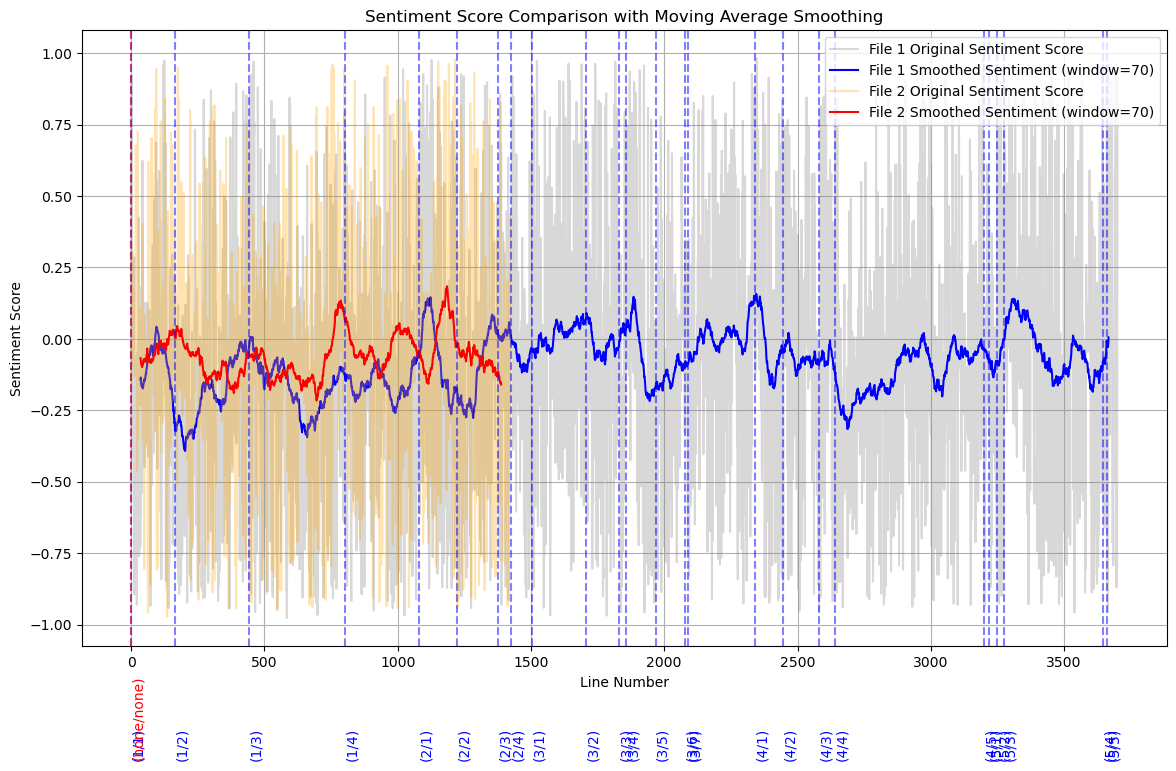

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 첫 번째와 두 번째 CSV 파일 경로 지정
file_path1 = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\셰익스피어\\리처드 3세\\RoBertA_output_with_sentiment_scores.csv"
file_path2 = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\파우스트 박사\\RoBertA_output_with_sentiment_scores.csv"

# 첫 번째 CSV 파일 읽기
df1 = pd.read_csv(file_path1)
df1['line_number'] = range(len(df1))
window_size = 70
df1['smoothed_sentiment'] = df1['sentiment_score'].rolling(window=window_size, center=True).mean()

# 두 번째 CSV 파일 읽기
df2 = pd.read_csv(file_path2)
df2['line_number'] = range(len(df2))
df2['smoothed_sentiment'] = df2['sentiment_score'].rolling(window=window_size, center=True).mean()

# 시각화 설정
plt.figure(figsize=(14, 8))

# 첫 번째 파일 감정 분석 시각화
plt.plot(df1['line_number'], df1['sentiment_score'], label='File 1 Original Sentiment Score', color='gray', alpha=0.3)
plt.plot(df1['line_number'], df1['smoothed_sentiment'], label=f'File 1 Smoothed Sentiment (window={window_size})', color='blue')

# 두 번째 파일 감정 분석 시각화
plt.plot(df2['line_number'], df2['sentiment_score'], label='File 2 Original Sentiment Score', color='orange', alpha=0.3)
plt.plot(df2['line_number'], df2['smoothed_sentiment'], label=f'File 2 Smoothed Sentiment (window={window_size})', color='red')

# 첫 번째 파일의 'act'와 'scene' 구분 추가
previous_act_scene = None
for i, row in df1.iterrows():
    current_act_scene = (row['act'], row['scene'])
    if current_act_scene != previous_act_scene:
        plt.axvline(x=row['line_number'], color='blue', linestyle='--', alpha=0.5)
        plt.text(row['line_number'], df1['sentiment_score'].min() - 0.5,
                 f"({row['act']}/{row['scene']})", rotation=45, verticalalignment='bottom', color='blue')
        previous_act_scene = current_act_scene

# 두 번째 파일의 'act'와 'scene' 구분 추가
previous_act_scene = None
for i, row in df2.iterrows():
    current_act_scene = (row['act'], row['scene'])
    if current_act_scene != previous_act_scene:
        plt.axvline(x=row['line_number'], color='red', linestyle='--', alpha=0.5)
        plt.text(row['line_number'], df2['sentiment_score'].min() - 0.5,
                 f"({row['act']}/{row['scene']})", rotation=45, verticalalignment='bottom', color='red')
        previous_act_scene = current_act_scene

# 그래프 설정
plt.xlabel('Line Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Comparison with Moving Average Smoothing')
plt.legend()
plt.grid(True)
plt.show()


비교 그래프 정규화

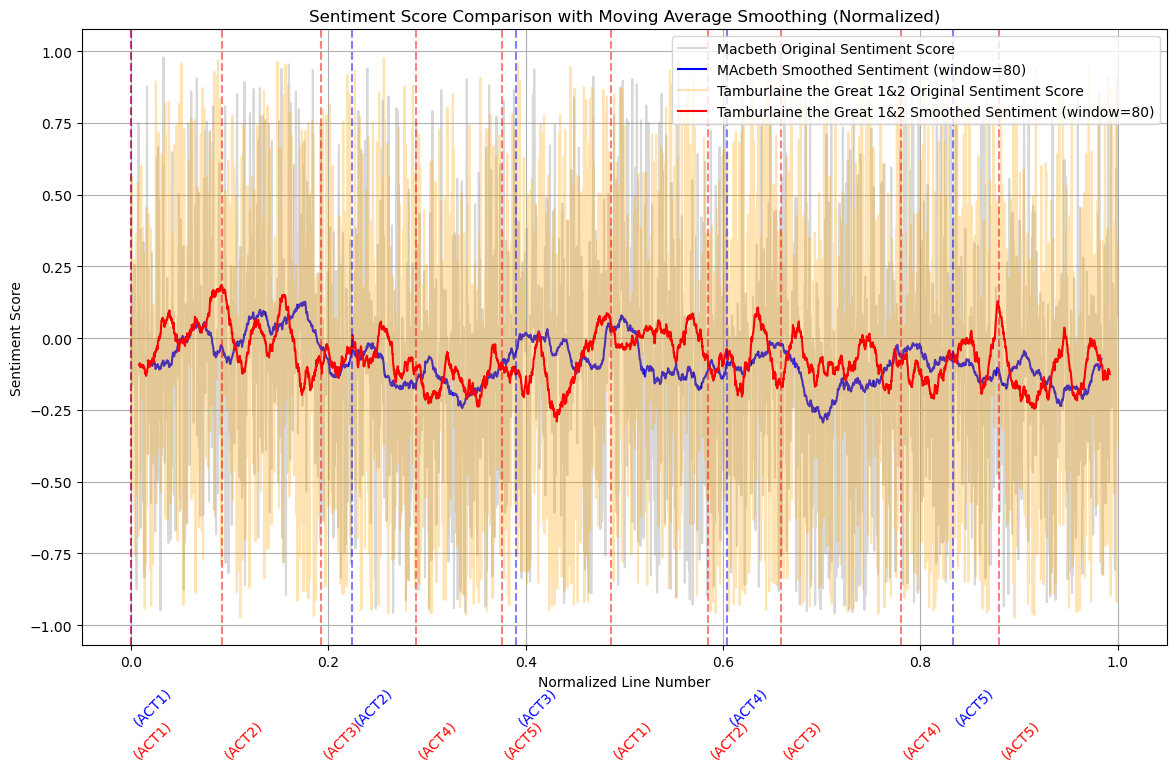

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 첫 번째와 두 번째 CSV 파일 경로 지정
file_path1 = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\셰익스피어\\맥베스\RoBertA_output_with_sentiment_scores.csv"
file_path2 = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\탬벌레인 대왕 총합본\\RoBertA_output_with_sentiment_scores.csv"

# 첫 번째 CSV 파일 읽기
df1 = pd.read_csv(file_path1)
df1['line_number'] = range(len(df1))
df1['normalized_line_number'] = df1['line_number'] / df1['line_number'].max()  # 정규화
window_size = 80
df1['smoothed_sentiment'] = df1['sentiment_score'].rolling(window=window_size, center=True).mean()

# 두 번째 CSV 파일 읽기
df2 = pd.read_csv(file_path2)
df2['line_number'] = range(len(df2))
df2['normalized_line_number'] = df2['line_number'] / df2['line_number'].max()  # 정규화
df2['smoothed_sentiment'] = df2['sentiment_score'].rolling(window=window_size, center=True).mean()

# 시각화 설정
plt.figure(figsize=(14, 8))

# 첫 번째 파일 감정 분석 시각화
plt.plot(df1['normalized_line_number'], df1['sentiment_score'], label='Macbeth Original Sentiment Score', color='gray', alpha=0.3)
plt.plot(df1['normalized_line_number'], df1['smoothed_sentiment'], label=f'MAcbeth Smoothed Sentiment (window={window_size})', color='blue')

# 두 번째 파일 감정 분석 시각화
plt.plot(df2['normalized_line_number'], df2['sentiment_score'], label='Tamburlaine the Great 1&2 Original Sentiment Score', color='orange', alpha=0.3)
plt.plot(df2['normalized_line_number'], df2['smoothed_sentiment'], label=f'Tamburlaine the Great 1&2 Smoothed Sentiment (window={window_size})', color='red')

# 첫 번째 파일의 'act'와 'scene' 구분 추가
previous_act_scene = None
for i, row in df1.iterrows():
    current_act_scene = (row['act']) #row['scene'])
    if current_act_scene != previous_act_scene:
        plt.axvline(x=row['normalized_line_number'], color='blue', linestyle='--', alpha=0.5)
        plt.text(row['normalized_line_number'], df1['sentiment_score'].min() - 0.4,
                 f"(ACT{row['act']})", # /{row['scene']})", 
                 rotation=45, verticalalignment='bottom', color='blue')
        previous_act_scene = current_act_scene

# 두 번째 파일의 'act'와 'scene' 구분 추가
previous_act_scene = None
for i, row in df2.iterrows():
    current_act_scene = (row['act']) #row['scene'])
    if current_act_scene != previous_act_scene:
        plt.axvline(x=row['normalized_line_number'], color='red', linestyle='--', alpha=0.5)
        plt.text(row['normalized_line_number'], df2['sentiment_score'].min() - 0.5,
                 f"(ACT{row['act']})", # /{row['scene']})", 
                 rotation=45, verticalalignment='bottom', color='red')
        previous_act_scene = current_act_scene

# 그래프 설정
plt.xlabel('Normalized Line Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Comparison with Moving Average Smoothing (Normalized)')
plt.legend()
plt.grid(True)
plt.show()


감정 개수

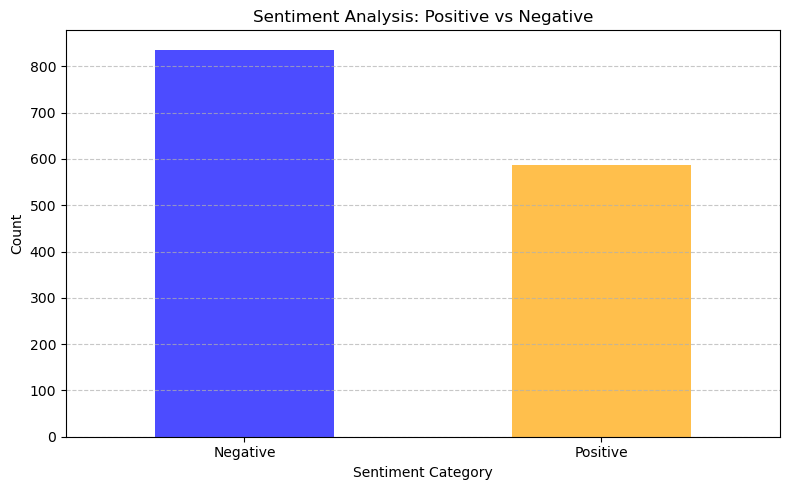

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기
file_path = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\파우스트 박사\\RoBertA_output_with_sentiment_scores.csv"  # CSV 파일 경로를 입력하세요.
data = pd.read_csv(file_path)

# 감정 점수 0인 값 삭제
data = data[data['sentiment_score'] != 0]

# 감정 점수에 따라 Positive와 Negative로 분류
data['category'] = data['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Positive와 Negative의 수 세기
category_counts = data['category'].value_counts()

# 막대 그래프 시각화
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Sentiment Analysis: Positive vs Negative')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 보여주기
plt.tight_layout()
plt.show()


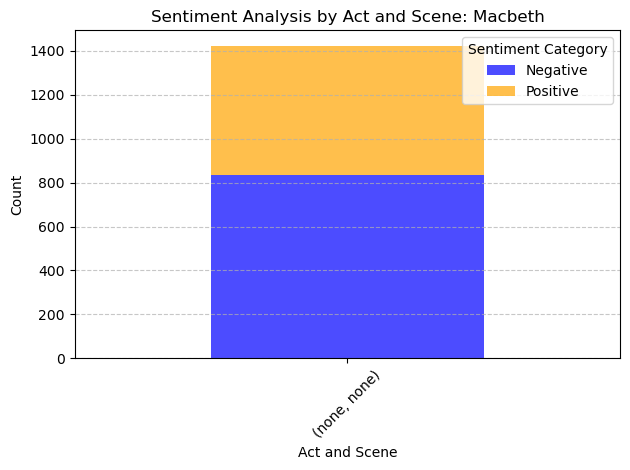

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기
file_path = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\파우스트 박사\\RoBertA_output_with_sentiment_scores.csv"  # CSV 파일 경로를 입력하세요.
data = pd.read_csv(file_path)

# 감정 점수 0인 값 삭제
data = data[data['sentiment_score'] != 0]

# 감정 점수에 따라 Positive와 Negative로 분류
data['category'] = data['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# act와 scene별로 Positive와 Negative 수 세기
grouped_data = data.groupby(['act', 'scene', 'category']).size().unstack(fill_value=0)

# 막대 그래프 시각화
grouped_data.plot(kind='bar', stacked=True, color=['blue', 'orange'], alpha=0.7)
plt.title('Sentiment Analysis by Act and Scene: Macbeth')
plt.xlabel('Act and Scene')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Category', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 보여주기
plt.tight_layout()
plt.show()


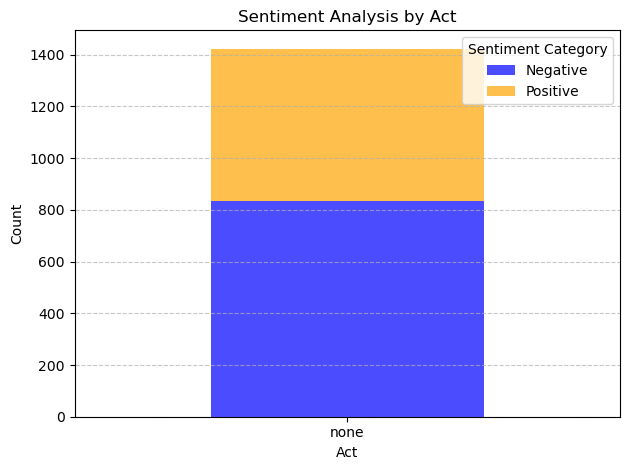

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기
file_path = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\크리스토퍼 말로우\\파우스트 박사\\RoBertA_output_with_sentiment_scores.csv"  # CSV 파일 경로를 입력하세요.
data = pd.read_csv(file_path)

# 감정 점수 0인 값 삭제
data = data[data['sentiment_score'] != 0]

# 감정 점수에 따라 Positive와 Negative로 분류
data['category'] = data['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# act별로 Positive와 Negative 수 세기
grouped_data = data.groupby(['act', 'category']).size().unstack(fill_value=0)

# 막대 그래프 시각화
grouped_data.plot(kind='bar', stacked=True, color=['blue', 'orange'], alpha=0.7)
plt.title('Sentiment Analysis by Act')
plt.xlabel('Act')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sentiment Category', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 보여주기
plt.tight_layout()
plt.show()


RoBertA 감정분석

In [1]:
pip install transformers torch


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# RoBERTa 모델과 토크나이저 초기화
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# 감정 점수를 계산하는 함수
def get_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    scores = outputs.logits[0].softmax(dim=0)
    # 긍정 점수 - 부정 점수를 계산하여 전반적인 감정 점수를 산출
    sentiment_score = scores[2].item() - scores[0].item()
    return sentiment_score

# 입력 파일 읽기
file_path = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\셰익스피어\\archive\\archive\\shakespeare_plays.csv"  # 입력 파일 경로
df = pd.read_csv(file_path)

# 'text' 칼럼의 각 대사에 대해 감정 점수 계산
df['sentiment_score'] = df['text'].apply(get_sentiment)

# 결과를 새로운 CSV 파일로 저장
output_path = 'C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\셰익스피어\\archive\\archive\\RoBertA_output_with_sentiment_scores.csv'
df.to_csv(output_path, index=False)

print(f"감정 점수가 추가된 파일이 '{output_path}'에 저장되었습니다.")


c:\Users\kang8\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

c:\Users\kang8\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kang8\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment-latest. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


감정 점수가 추가된 파일이 'C:\Users\kang8\OneDrive\바탕 화면\빅데이터융합개론\셰익스피어\archive\archive\RoBertA_output_with_sentiment_scores.csv'에 저장되었습니다.


감정 점수 소수점 4자리 반올림

In [28]:
import pandas as pd

# 데이터 로드
df = pd.read_csv("C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\셰익스피어\\archive\\archive\\RoBertA_output_with_sentiment_scores.csv")

# 감정 점수를 소수점 4자리로 반올림
df['sentiment_score'] = df['sentiment_score'].round(4)

# 수정된 DataFrame을 새로운 CSV 파일로 저장
df.to_csv("C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\셰익스피어\\archive\\archive\\RoBertA_output_with_sentiment_scores_round.csv", index=False)


In [42]:
셰익스피어 작품 장르별 감정 변화 그래프

SyntaxError: invalid syntax (2698271893.py, line 1)

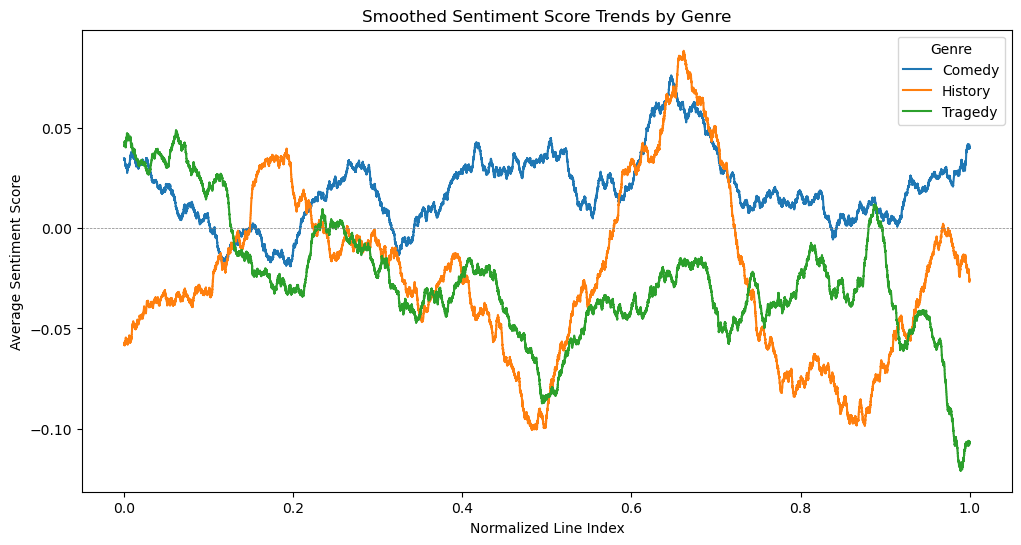

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드
df = pd.read_csv("C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\셰익스피어\\archive\\archive\\RoBertA_output_with_sentiment_scores_round.csv")

# 'genre' 컬럼에서 오탈자 수정 ('Tragity' -> 'Tragedy')
df['genre'] = df['genre'].replace('Tragity', 'Tragedy')

# 감정 점수 컬럼이 누락된 경우 NaN 제거
df = df.dropna(subset=['sentiment_score'])

# 각 장르별로 라인 번호를 재정의하여 x값이 0에서 시작하도록 정규화
df['line_index'] = df.groupby('genre').cumcount()

# 각 장르별 최대 line_index를 계산하여 정규화
max_line_index = df.groupby('genre')['line_index'].transform('max')
df['normalized_line_index'] = df['line_index'] / max_line_index

# 장르별 평균 감정 점수 변화 계산
genre_sentiment_trends = df.groupby(['genre', 'normalized_line_index'])['sentiment_score'].mean().unstack(level=0)

# 이동 평균(스무딩)을 위한 함수 정의
def moving_average(data, window_size=10000):
    return data.rolling(window=window_size, min_periods=1, center=True).mean()

# 그래프 생성
plt.figure(figsize=(12, 6))

# 각 장르별 감정 점수에 대해 스무딩 처리 후 그래프 출력
for genre in genre_sentiment_trends.columns:
    smoothed_sentiment = moving_average(genre_sentiment_trends[genre])
    plt.plot(genre_sentiment_trends.index, smoothed_sentiment, label=genre)

# y=0에 점선 기준선 추가
plt.axhline(0, color='gray', linestyle='--', lw=0.5)  # 점선으로 기준선 추가

# 그래프 스타일 설정
plt.title('Smoothed Sentiment Score Trends by Genre')
plt.xlabel('Normalized Line Index')
plt.ylabel('Average Sentiment Score')
plt.legend(title='Genre')
plt.show()


<Figure size 1200x600 with 0 Axes>

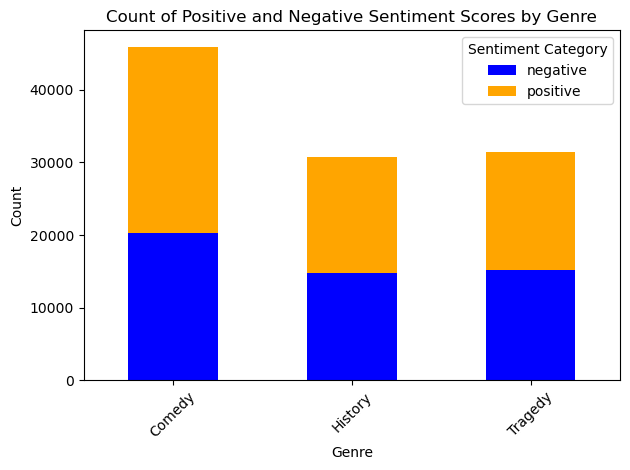

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\셰익스피어\\archive\\archive\\RoBertA_output_with_sentiment_scores_round.csv")

# 'genre' 컬럼에서 오탈자 수정 ('Tragity' -> 'Tragedy')
df['genre'] = df['genre'].replace('Tragity', 'Tragedy')

# 감정 점수 컬럼이 누락된 경우 NaN 제거
df = df.dropna(subset=['sentiment_score'])

# 감정 점수를 기준으로 positive와 negative로 분류
df['sentiment_category'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative')

# 각 장르별 positive와 negative 개수 세기
genre_sentiment_counts = df.groupby(['genre', 'sentiment_category']).size().unstack(fill_value=0)

# 차트 생성
plt.figure(figsize=(12, 6))
genre_sentiment_counts.plot(kind='bar', stacked=True, color=['blue', 'orange'])

# 그래프 스타일 설정
plt.title('Count of Positive and Negative Sentiment Scores by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Category')
plt.tight_layout()  # 레이아웃 조정
plt.show()


셰익스피어 장르별 토픽 모델링

In [49]:
pip install gensim


Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer


In [52]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer

# 데이터 로드
df = pd.read_csv("C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\셰익스피어\\archive\\archive\\RoBertA_output_with_sentiment_scores_round.csv")

# 'text' 열의 데이터 전처리 (예: 소문자화, 특수 문자 제거)
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace('[^\w\s]', '')

# 장르별로 텍스트 수집
grouped_texts = df.groupby('genre')['text'].apply(list)

# LDA 모델을 위한 사전과 코퍼스 생성
texts = grouped_texts.sum()  # 모든 장르의 텍스트를 하나의 리스트로 통합
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Gensim에 필요한 데이터 구조로 변환
dictionary = corpora.Dictionary([text.split() for text in texts])
corpus = [dictionary.doc2bow(text.split()) for text in texts]

# LDA 모델 훈련
num_topics = 5  # 원하는 주제 수
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Perplexity 계산
perplexity = lda_model.log_perplexity(corpus)
print(f"Perplexity: {perplexity}")

# Coherence Score 계산
coherence_model = CoherenceModel(model=lda_model, texts=[text.split() for text in texts], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")

# 각 주제에서 가장 중요한 단어 출력
for idx in range(lda_model.num_topics):
    print(f"Topic {idx}: {lda_model.print_topic(idx)}")


<>:12: DeprecationWarning: invalid escape sequence '\w'
<>:12: DeprecationWarning: invalid escape sequence '\w'
C:\Users\kang8\AppData\Local\Temp\ipykernel_77056\2734653813.py:12: DeprecationWarning: invalid escape sequence '\w'
  df['text'] = df['text'].str.replace('[^\w\s]', '')


Perplexity: -8.085572636999649
Coherence Score: 0.25313092714872065
Topic 0: 0.071*"i" + 0.031*"the" + 0.026*"to" + 0.020*"and" + 0.020*"that" + 0.018*"you" + 0.018*"not" + 0.018*"have" + 0.014*"for" + 0.013*"it"
Topic 1: 0.063*"my" + 0.022*"and" + 0.020*"good" + 0.016*"to" + 0.016*"with" + 0.015*"how" + 0.015*"o" + 0.012*"you" + 0.012*"come," + 0.011*"see"
Topic 2: 0.036*"and" + 0.029*"as" + 0.024*"to" + 0.022*"all" + 0.022*"a" + 0.021*"so" + 0.019*"are" + 0.018*"you" + 0.017*"be" + 0.015*"our"
Topic 3: 0.085*"the" + 0.076*"of" + 0.045*"and" + 0.029*"a" + 0.025*"in" + 0.023*"his" + 0.022*"is" + 0.016*"that" + 0.016*"this" + 0.012*"to"
Topic 4: 0.057*"thy" + 0.057*"thou" + 0.046*"me" + 0.033*"to" + 0.023*"let" + 0.019*"and" + 0.019*"him" + 0.017*"give" + 0.014*"thee" + 0.010*"what"


In [53]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stopwords

# 추가할 르네상스 영어 불용어 리스트
renaissance_stopwords = set([
   'thee', 'thou', 'thy', 'thine', 'ye', 'art', 'hast', 'dost',
    'wouldst', 'couldst', 'shouldst', 'speakest', 'knowest',
    'hath', 'dost', 'art thou', 'art not', 'mightest', 'mayest',
    'whence', 'hence', 'wherefore', 'what', 'which', 'who', 
    'when', 'why', 'ere', 'forsooth', 'alas', 'verily', 
    'anon', 'fie', 'goest', 'comest', 'seeest', 'thinkest', 
    'lovest', 'dost thou', 'I', 'me', 'my', 'mine', 'we', 
    'us', 'our', 'ours', "'d", "'s", "'ll", "'Tis", '-','--', "'twas"
])

# 데이터 로드
df = pd.read_csv("C:\\Users\\kang8\\OneDrive\\바탕 화면\\빅데이터융합개론\\셰익스피어\\archive\\archive\\RoBertA_output_with_sentiment_scores_round.csv")

# 'text' 열의 데이터 전처리 (예: 소문자화, 특수 문자 제거)
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace('[^\w\s]', '')

# 모든 불용어 리스트 생성
stopwords = set(sklearn_stopwords).union(renaissance_stopwords)

# 불용어 제거 함수 정의
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stopwords])

# 불용어 제거 적용
df['text'] = df['text'].apply(remove_stopwords)

# 장르별로 텍스트 수집
grouped_texts = df.groupby('genre')['text'].apply(list)

# 각 장르별로 LDA 모델 훈련 및 성능 지표 계산
for genre, texts in grouped_texts.items():
    # LDA 모델을 위한 사전과 코퍼스 생성
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(texts)
    
    dictionary = corpora.Dictionary([text.split() for text in texts])
    corpus = [dictionary.doc2bow(text.split()) for text in texts]

    # LDA 모델 훈련
    num_topics = 5  # 원하는 주제 수
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    # Perplexity 계산
    perplexity = lda_model.log_perplexity(corpus)
    print(f"{genre} - Perplexity: {perplexity}")

    # Coherence Score 계산
    coherence_model = CoherenceModel(model=lda_model, texts=[text.split() for text in texts], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print(f"{genre} - Coherence Score: {coherence_score}")

    # 각 주제에서 가장 중요한 단어 출력
    print(f"{genre} - Top 5 Topics:")
    for idx in range(lda_model.num_topics):
        print(f"Topic {idx}: {lda_model.print_topic(idx)}")
    print("\n" + "="*50 + "\n")


<>:25: DeprecationWarning: invalid escape sequence '\w'
<>:25: DeprecationWarning: invalid escape sequence '\w'
C:\Users\kang8\AppData\Local\Temp\ipykernel_77056\302864354.py:25: DeprecationWarning: invalid escape sequence '\w'
  df['text'] = df['text'].str.replace('[^\w\s]', '')


Comedy - Perplexity: -9.899027737875793
Comedy - Coherence Score: 0.3093564756400327
Comedy - Top 5 Topics:
Topic 0: 0.012*"let" + 0.009*"o," + 0.007*"fair" + 0.007*"that's" + 0.007*"shall" + 0.007*"good" + 0.005*"him." + 0.005*"i'll" + 0.005*"lord" + 0.004*"life"
Topic 1: 0.022*"shall" + 0.016*"know" + 0.012*"sir," + 0.012*"good" + 0.011*"think" + 0.010*"say" + 0.009*"love" + 0.008*"no," + 0.008*"'tis" + 0.008*"you,"
Topic 2: 0.012*"tell" + 0.010*"you," + 0.009*"you." + 0.009*"i'll" + 0.009*"speak" + 0.008*"thee," + 0.008*"pray" + 0.007*"it," + 0.006*"me," + 0.006*"master"
Topic 3: 0.017*"come" + 0.011*"o" + 0.009*"ay," + 0.008*"sir" + 0.008*"now," + 0.006*"till" + 0.005*"good" + 0.005*"what," + 0.005*"great" + 0.005*"let"
Topic 4: 0.019*"like" + 0.012*"why," + 0.011*"come," + 0.008*"shall" + 0.008*"him," + 0.007*"doth" + 0.007*"make" + 0.005*"better" + 0.005*"bear" + 0.005*"sweet"


History - Perplexity: -9.777251869470444
History - Coherence Score: 0.407917055049783
History - Top 5 